### $\text{Take-home Exam (Midsem)}$

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
# analytical solution for PDE
def u(x,t):
    if x >= (3/2)*t*t:
        return np.power((x-(3/2)*t*t),2)
    else:
        return 0

In [3]:
# calculate analytical solution

Ua_t0 = []
Ua_t1 = []
Ua_t2 = []

step = 1/80
x_domain = np.arange(0,1+step,step=step)

for x in x_domain:
    Ua_t0.append(u(x,0))
    Ua_t1.append(u(x,1/4))
    Ua_t2.append(u(x,1/2))
    x += step

$\text{(a) First, we create three plots for the analytical solution at times t = 0,1/4,1/2.}$

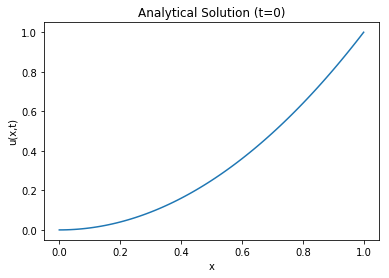

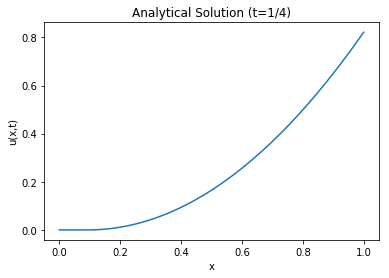

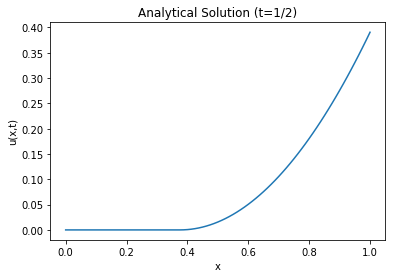

In [4]:
plt.plot(x_domain,Ua_t0)
plt.title("Analytical Solution (t=0)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.show()

plt.plot(x_domain,Ua_t1)
plt.title("Analytical Solution (t=1/4)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.show()

plt.plot(x_domain,Ua_t2)
plt.title("Analytical Solution (t=1/2)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.show()

$\text{Prior to implementing the wendoff box method, we simplify the expression of the scheme as given in the text as}$
<br/>
$\text{the following:}$

<br/>

$U_{m+1}^{n+1} = U_{m}^{n} + \frac{(1-\lambda(1+t_{n+1}))}{(1+\lambda(1+t_{n+1}))}(U_{m+1}^{n} - U_{m}^{n+1})$

In [5]:
def wendoff_box(h,k,X,T):
    
    lamda = k/h
    
    x_domain = np.arange(X[0],X[1]+h,step=h)
    t_domain = np.arange(T[0],T[1]+k,step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    
    # use initial condition to compute for all x at t = 0
    for i in range(x_size):
        U[0][i] = np.power(i*h,2)
    
    # use boundary condition to compute for all t at x = 0
    for i in range(t_size):
        U[i][0] = 0
    
    # use wendoff scheme to compute solution
    for i in range(1,t_size):
        for j in range(1,x_size):
            U[i][j] = U[i-1][j-1] + ((1-lamda*(1+j*k))/(1+lamda*(1+j*k)))*(U[i-1][j] - U[i][j-1])
    
    return U

In [6]:
# computing solution using Wendoff Box scheme

steps = [1/10,1/20,1/40,1/80]
X = [0,1]
T = [0,1/2]

U0 = wendoff_box(steps[0],steps[0],X,T)
x0_domain = np.arange(X[0],X[1]+steps[0],step=steps[0])
t0_domain = np.arange(T[0],T[1]+steps[0],step=steps[0])

U1 = wendoff_box(steps[1],steps[1],X,T)
x1_domain = np.arange(X[0],X[1]+steps[1],step=steps[1])
t1_domain = np.arange(T[0],T[1]+steps[1],step=steps[1])

U2 = wendoff_box(steps[2],steps[2],X,T)
x2_domain = np.arange(X[0],X[1]+steps[2],step=steps[2])
t2_domain = np.arange(T[0],T[1]+steps[2],step=steps[2])

U3 = wendoff_box(steps[3],steps[3],X,T)
x3_domain = np.arange(X[0],X[1]+steps[3],step=steps[3])
t3_domain = np.arange(T[0],T[1]+steps[3],step=steps[3])

In [7]:
plt_u00 = U0[0]
plt_u01 = U0[len(U0)//2 + 1]
plt_u02 = U0[-1]

plt_u10 = U1[0]
plt_u11 = U1[len(U1)//2 + 1]
plt_u12 = U1[-1]

plt_u20 = U2[0]
plt_u21 = U2[len(U2)//2 + 1]
plt_u22 = U2[-1]

plt_u30 = U3[0]
plt_u31 = U3[len(U3)//2 + 1]
plt_u32 = U3[-1]

$\text{(b) Now, we plot the discrete solution computed at times t = 0,1/4,1/2 for various choices of h,k.}$

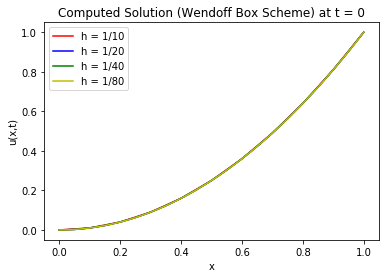

In [8]:
plt.title("Computed Solution (Wendoff Box Scheme) at t = 0")
plt.plot(x0_domain,plt_u00,color='r',label="h = 1/10")
plt.plot(x1_domain,plt_u10,color='b',label="h = 1/20")
plt.plot(x2_domain,plt_u20,color='g',label="h = 1/40")
plt.plot(x3_domain,plt_u30,color='y',label="h = 1/80")
plt.legend(loc='best')
plt.ylabel('u(x,t)')
plt.xlabel('x')
plt.show()

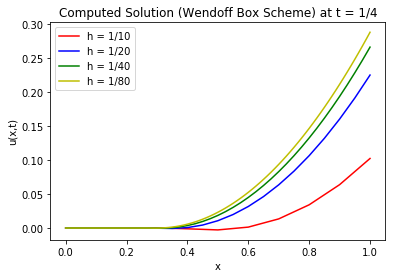

In [9]:
plt.title("Computed Solution (Wendoff Box Scheme) at t = 1/4")
plt.plot(x0_domain,plt_u01,color='r',label="h = 1/10")
plt.plot(x1_domain,plt_u11,color='b',label="h = 1/20")
plt.plot(x2_domain,plt_u21,color='g',label="h = 1/40")
plt.plot(x3_domain,plt_u31,color='y',label="h = 1/80")
plt.legend(loc='best')
plt.ylabel('u(x,t)')
plt.xlabel('x')
plt.show()

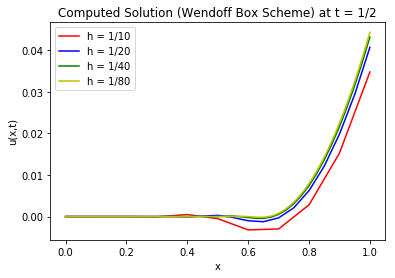

In [10]:
plt.title("Computed Solution (Wendoff Box Scheme) at t = 1/2")
plt.plot(x0_domain,plt_u02,color='r',label="h = 1/10")
plt.plot(x1_domain,plt_u12,color='b',label="h = 1/20")
plt.plot(x2_domain,plt_u22,color='g',label="h = 1/40")
plt.plot(x3_domain,plt_u32,color='y',label="h = 1/80")
plt.legend(loc='best')
plt.ylabel('u(x,t)')
plt.xlabel('x')
plt.show()

In [11]:
e0 = abs(plt_u02[-1] - Ua_t2[-1])
e1 = abs(plt_u12[-1] - Ua_t2[-1])
e2 = abs(plt_u22[-1] - Ua_t2[-1])
e3 = abs(plt_u32[-1] - Ua_t2[-1])
print("error at h = 1/10:",e0)
print("error at h = 1/20:",e1)
print("error at h = 1/40:",e2)
print("error at h = 1/80:",e3)

error at h = 1/10: 0.3558558316901258
error at h = 1/20: 0.3499290504496936
error at h = 1/40: 0.3474488603227297
error at h = 1/80: 0.3463082300867334


$\text{(c) Finally, we create a log-log plot showing the second order convergence of the error for each of the choices of spatial and}$
$\text{time steps computed at x=1, t=1/2.}$

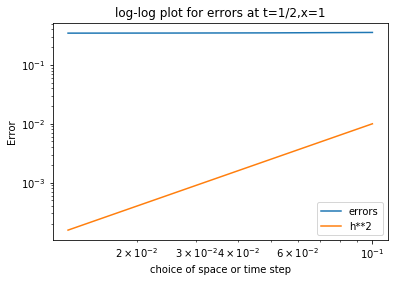

In [12]:
errors = [e0,e1,e2,e3]
steps = [1/10,1/20,1/40,1/80]
steps2 = np.power(steps,2)

plt.xticks(steps)
plt.title('log-log plot for errors at t=1/2,x=1')
plt.plot(steps,errors,label='errors')
plt.plot(steps,steps2,label='h**2')
plt.legend(loc='best')
plt.ylabel('Error')
plt.xlabel('choice of space or time step')
plt.loglog()
plt.show()

Ashwin Singh
<br/>
2017222